In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from datetime import datetime
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from models import MLP
from utils import test

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

Using cpu device


In [2]:
train_data = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor()
)

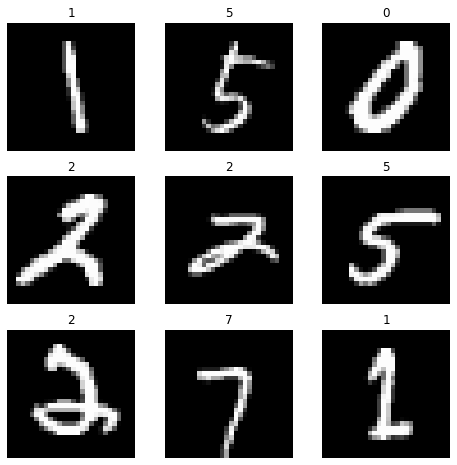

In [3]:
fig = plt.figure(figsize=(8, 8))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(label)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')

In [4]:
BATCH_SIZE = 64
HIDDEN_DIM = 64
NB_EPOCHS = 10
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
# class CNN(nn.Module):

#     def __init__(self, image_channels=1, output_dim=10):
#         super().__init__()
#         kernel_size = 4
#         stride = 2
#         self.net = nn.Sequential(
#             # input size: input_channels x 28 x 28
#             nn.Conv2d(image_channels, HIDDEN_DIM, kernel_size, stride),
#             nn.BatchNorm2d(HIDDEN_DIM),
#             nn.ReLU(inplace=True),
#             # state size: HIDDEN_DIM x 13 x 13
#             nn.Conv2d(HIDDEN_DIM, HIDDEN_DIM*2, kernel_size, stride),
#             nn.BatchNorm2d(HIDDEN_DIM*2),
#             nn.ReLU(inplace=True),
#             # state size: HIDDEN_DIM*2 x 5 x 5
#             nn.Conv2d(HIDDEN_DIM*2, 1, kernel_size, stride),
#             nn.Linear(HIDDEN_DIM*4, output_dim)
#  MAXPOOL
#         )

#     def forward(self, x):
#         return self.net(x)

In [6]:
def train(dataloader, model, loss_function, optimizer):

    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):

        X, y = X.to(device), y.to(device)
        
        # Compute prediction and loss
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            print('[{}/{}] loss: {}'.format(batch*len(X), size, loss))


In [7]:
model = MLP().to(device)
# model = CNN().to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [8]:
test(test_dataloader, model, loss_function, device)
for e in range(1, NB_EPOCHS+1):
    print(f'Epoch {e}/{NB_EPOCHS}\n-------------------')
    train(train_dataloader, model, loss_function, optimizer)
    test(test_dataloader, model, loss_function, device)

Test error: 2.306140661239624
Accuracy 0.0846

Epoch 1/10
-------------------
[0/60000] loss: 2.307220458984375
[6400/60000] loss: 0.2643992304801941
[12800/60000] loss: 0.1955588310956955
[19200/60000] loss: 0.23902787268161774
[25600/60000] loss: 0.15231873095035553
[32000/60000] loss: 0.3590404689311981
[38400/60000] loss: 0.13433554768562317
[44800/60000] loss: 0.26170897483825684
[51200/60000] loss: 0.31598177552223206
[57600/60000] loss: 0.1598736047744751
Test error: 0.1342250257730484
Accuracy 0.9573

Epoch 2/10
-------------------
[0/60000] loss: 0.04893786832690239
[6400/60000] loss: 0.08462704718112946
[12800/60000] loss: 0.08991227298974991
[19200/60000] loss: 0.09962157905101776
[25600/60000] loss: 0.03616591542959213
[32000/60000] loss: 0.12490839511156082
[38400/60000] loss: 0.05247516185045242
[44800/60000] loss: 0.16582144796848297
[51200/60000] loss: 0.09624927490949631
[57600/60000] loss: 0.08591367304325104
Test error: 0.10849914699792862
Accuracy 0.9673

Epoch 3/10

In [9]:
torch.save(model.state_dict(), f'..\models\MLP_MNIST_weights_{datetime.now().strftime("%Y%m%d_%H%M")}.pth')